## Chapter 21: Olympic Data

In [23]:
using Query, CSVFiles, DataFrames, StatsPlots

In [24]:
ENV["COLUMNS"]=180

180

In [25]:
athletes = load("../data/olympic-athletes.csv") |> DataFrame;

In [26]:
first(athletes,5)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event
,Int64,String,String,Int64?,Int64?,Float64?,String,String,String,Int64,String,String,String,String
1,1,A Dijiang,M,24,180,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball
2,2,A Lamusi,M,23,170,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight
3,3,Gunnar Nielsen Aaby,M,24,missing,missing,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football
4,4,Edgar Lindenau Aabye,M,34,missing,missing,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War
5,5,Christine Jacoba Aaftink,F,21,185,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres


In [27]:
names(athletes)

15-element Array{String,1}:
 "ID"
 "Name"
 "Sex"
 "Age"
 "Height"
 "Weight"
 "Team"
 "NOC"
 "Games"
 "Year"
 "Season"
 "City"
 "Sport"
 "Event"
 "Medal"

In [28]:
athletes[!,:Event]

271116-element Array{String,1}:
 "Basketball Men's Basketball"
 "Judo Men's Extra-Lightweight"
 "Football Men's Football"
 "Tug-Of-War Men's Tug-Of-War"
 "Speed Skating Women's 500 metres"
 "Speed Skating Women's 1,000 metres"
 "Speed Skating Women's 500 metres"
 "Speed Skating Women's 1,000 metres"
 "Speed Skating Women's 500 metres"
 "Speed Skating Women's 1,000 metres"
 "Cross Country Skiing Men's 10 kilometres"
 "Cross Country Skiing Men's 50 kilometres"
 "Cross Country Skiing Men's 10/15 kilometres Pursuit"
 ⋮
 "Luge Mixed (Men)'s Doubles"
 "Hockey Men's Hockey"
 "Hockey Men's Hockey"
 "Football Men's Football"
 "Rowing Men's Lightweight Coxless Fours"
 "Rowing Men's Lightweight Coxless Fours"
 "Basketball Women's Basketball"
 "Luge Mixed (Men)'s Doubles"
 "Ski Jumping Men's Large Hill, Individual"
 "Ski Jumping Men's Large Hill, Team"
 "Bobsleigh Men's Four"
 "Bobsleigh Men's Four"

### What is the total number of medals given in all Olympics in the dataset?

In [29]:
athletes |> 
  @filter(_.Medal != "NA") |>
  DataFrame |>
  nrow

39783

### 2. Which athlete had the most Olympic gold medals in the Summer 2000 games? How many medals?

In [31]:
athletes |> 
  @filter(_.Year == 2000 && _.Medal == "Gold") |>
  @groupby(_.ID) |>
  @map({ID=key(_),Name=first(_.Name), num_golds= length(_)}) |>
  @orderby_descending(_.num_golds) |>
  DataFrame |>
  df -> first(df,6)

,ID,Name,num_golds
,Int64,String,Int64
1,25975,Inge de Bruijn,3
2,63912,Lenny Krayzelburg,3
3,119922,"Jennifer Elisabeth ""Jenny"" Thompson (-Cumpelik)",3
4,120087,Ian James Thorpe,3
5,134980,"Leontine Martha Henrica Petronella ""Leontien"" Zijlaard-van Moorsel",3
6,3281,Simona Amnar (-Tabr),2


### 3. Collectively taking each summer Olympics, give the top 5 athletes by number of medals.

In [32]:
athletes |>
  @filter(_.Medal != "NA") |>
  @groupby(_.ID) |>
  @map({Name = first(_.Name), Team = first(_.Team), Sport = first(_.Sport), total_medals = length(_), years = join(unique(_.Year),", ")}) |>
  @orderby_descending(_.total_medals) |>
  DataFrame |>
  df -> first(df,15)

,Name,Team,Sport,total_medals,years
,String,String,String,Int64,String
1,"Michael Fred Phelps, II",United States,Swimming,28,"2004, 2008, 2012, 2016"
2,Larysa Semenivna Latynina (Diriy-),Soviet Union,Gymnastics,18,"1956, 1960, 1964"
3,Nikolay Yefimovich Andrianov,Soviet Union,Gymnastics,15,"1972, 1976, 1980"
4,Ole Einar Bjrndalen,Norway,Biathlon,13,"1998, 2002, 2006, 2010, 2014"
5,Edoardo Mangiarotti,Italy,Fencing,13,"1936, 1948, 1952, 1956, 1960"
6,Takashi Ono,Japan,Gymnastics,13,"1952, 1956, 1960, 1964"
7,Borys Anfiyanovych Shakhlin,Soviet Union,Gymnastics,13,"1956, 1960, 1964"
8,Natalie Anne Coughlin (-Hall),United States,Swimming,12,"2004, 2008, 2012"
9,Birgit Fischer-Schmidt,East Germany,Canoeing,12,"1980, 1988, 1992, 1996, 2000, 2004"


### Produce a new DataFrame that lists total number of medals by country. 

In [35]:
athletes |>
  @filter(_.Medal != "NA" && _.Season == "Winter") |>
  @groupby(_.Team) |>
  @map({Country = key(_), Total_Medals = length(_)}) |>
  @orderby_descending(_.Total_Medals) |>
  DataFrame |> 
  df -> first(df,10)

,Country,Total_Medals
,String,Int64
1,Canada,575
2,United States,533
3,Norway,443
4,Sweden,428
5,Finland,426
6,Soviet Union,390
7,Germany,297
8,Austria,244
9,Russia,216


### Produce a line graph of the mean weight of athletes per games over the years.  Graph men and women with different colors

In [50]:
male_weights = athletes |>
  @filter(_.Sex == "M" && !ismissing(_.Weight)) |>
  @groupby(_.Year) |>
  @map({Year=key(_),weight=sum(_.Weight)/length(_)})

Year,weight
1992,#NA
2012,#NA
1920,#NA
1900,#NA
1994,#NA
2002,#NA
1952,#NA
1980,#NA
2000,#NA
1912,#NA


In [51]:
?ismissing

search: ismissing disallowmissing disallowmissing!



```
ismissing(x)
```

Indicate whether `x` is [`missing`](@ref).


In [62]:
male_weights = athletes |> 
  df->dropmissing(df, :Weight) |>
  @filter(_.Sex == "M") |>
  @groupby(_.Year) |>
  @map({Year=key(_),weight=mean(_.Weight)}) |>
  @orderby(_.Year) |>
  DataFrame 

,Year,weight
,Int64,Float64
1,1896,71.3878
2,1900,74.557
3,1904,72.1973
4,1906,75.9171
5,1908,75.3861
6,1912,73.1174
7,1920,73.1383
8,1924,71.817
9,1928,72.0


In [61]:
female_weights = athletes |> 
  df->dropmissing(df, :Weight) |>
  @filter(_.Sex == "F") |>
  @groupby(_.Year) |>
#  @map({Year=key(_),weight=sum(_.Weight)/length(_)}) |>
  @map({Year=key(_),weight=mean(_.Weight)}) |>
  @orderby(_.Year) |>
  DataFrame 

,Year,weight
,Int64,Float64
1,1920,58.0
2,1924,58.1429
3,1928,59.0179
4,1932,58.7719
5,1936,58.9886
6,1948,59.9818
7,1952,58.1487
8,1956,58.4573
9,1960,57.5158


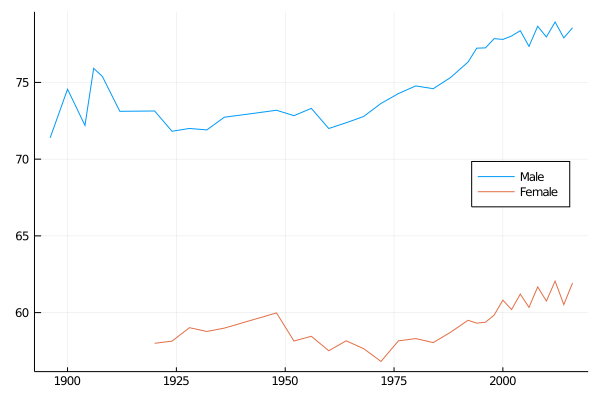

In [65]:
@df male_weights plot(:Year,:weight,label="Male",legend=:right)
@df female_weights plot!(:Year,:weight,label="Female")

### Plot the number of medals that the U.S. collected over each olympic year.

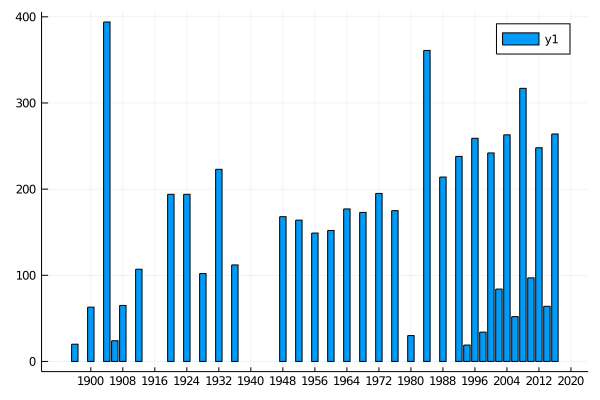

In [94]:
athletes |>
  @filter(_.NOC == "USA" && _.Medal != "NA") |>
  @groupby(_.Year) |>
  @map({Year = key(_), num_medals=length(_)}) |>
  @orderby(_.Year) |>
  @df bar(:Year,:num_medals, xticks=1900:8:2020)

In [95]:
athletes |>
  @filter(_.Year == 1906)

ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
139,"""George \""Ioannis\"" Abbot""","""M""",#NA,#NA,#NA,"""Thessalonki-1""","""GRE""","""1906 Summer""",1906,"""Summer""","""Athina""","""Football""","""Football Men's Football""","""Bronze"""
508,"""Bernhard Abraham""","""M""",#NA,#NA,#NA,"""Germany""","""GER""","""1906 Summer""",1906,"""Summer""","""Athina""","""Gymnastics""","""Gymnastics Men's Team All-Around""","""NA"""
520,"""Sidney Solomon Abrahams""","""M""",21,#NA,#NA,"""Great Britain""","""GBR""","""1906 Summer""",1906,"""Summer""","""Athina""","""Athletics""","""Athletics Men's 100 metres""","""NA"""
520,"""Sidney Solomon Abrahams""","""M""",21,#NA,#NA,"""Great Britain""","""GBR""","""1906 Summer""",1906,"""Summer""","""Athina""","""Athletics""","""Athletics Men's Long Jump""","""NA"""
1208,"""Ioannis Agrimis""","""M""",#NA,#NA,#NA,"""Large boat, Central Naval Prep School \""Poros\""-1""","""GRE""","""1906 Summer""",1906,"""Summer""","""Athina""","""Rowing""","""Rowing Men's 17-Man Naval Rowing Boats""","""Gold"""
1355,"""Henrik Aleksander \""Heikki\"" hlman (-Pennola)""","""M""",26,#NA,#NA,"""Finland""","""FIN""","""1906 Summer""",1906,"""Summer""","""Athina""","""Athletics""","""Athletics Men's Pole Vault""","""NA"""
1355,"""Henrik Aleksander \""Heikki\"" hlman (-Pennola)""","""M""",26,#NA,#NA,"""Finland""","""FIN""","""1906 Summer""",1906,"""Summer""","""Athina""","""Athletics""","""Athletics Men's Shot Put""","""NA"""
1355,"""Henrik Aleksander \""Heikki\"" hlman (-Pennola)""","""M""",26,#NA,#NA,"""Finland""","""FIN""","""1906 Summer""",1906,"""Summer""","""Athina""","""Athletics""","""Athletics Men's Stone Throw""","""NA"""
1355,"""Henrik Aleksander \""Heikki\"" hlman (-Pennola)""","""M""",26,#NA,#NA,"""Finland""","""FIN""","""1906 Summer""",1906,"""Summer""","""Athina""","""Athletics""","""Athletics Men's Discus Throw""","""NA"""
1355,"""Henrik Aleksander \""Heikki\"" hlman (-Pennola)""","""M""",26,#NA,#NA,"""Finland""","""FIN""","""1906 Summer""",1906,"""Summer""","""Athina""","""Athletics""","""Athletics Men's Javelin Throw, Freestyle""","""NA"""


### What age the most common athlete?

In [85]:
athletes |>
  @groupby(_.Age) |>
  @map({Age=key(_), num_athletes = length(_)}) |>
  @orderby_descending(_.num_athletes) |> 
  DataFrame |>
  df -> first(df,5)

,Age,num_athletes
,Int64?,Int64
1,23,21875
2,24,21720
3,22,20814
4,25,19707
5,21,19164


### Consider the winter games between 1950 and 1970.  Collectively of these games, what are the top 5 sports by total medals given? 

In [80]:
athletes |> 
  @filter( (1950 <= _.Year <= 1970) && _.Medal != "NA" && _.Season == "Winter") |>
  @groupby(_.Sport) |> 
  @map({Sport = key(_), num_medals=length(_)}) |>
  @orderby_descending(_.num_medals) |>
  DataFrame 

,Sport,num_medals
,String,Int64
1,Ice Hockey,255
2,Cross Country Skiing,159
3,Speed Skating,99
4,Alpine Skiing,90
5,Bobsleigh,72
6,Figure Skating,62
7,Luge,24
8,Biathlon,21
9,Ski Jumping,21
